## Import Data and Libraries

In [1]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


%run utils.ipynb

In [2]:
dos_df_path,fuzzy_df_path,attack_free_df_path=load_data_paths_from_config_to_notebooks("out_paths")


In [3]:
dos_df_pl = pl.read_csv(dos_df_path)
fuzzy_df_pl= pl.read_csv(fuzzy_df_path)
attack_free_df_pl= pl.read_csv(attack_free_df_path)

In [4]:
dos_df_pd = dos_df_pl.to_pandas()
fuzzy_df_pd=fuzzy_df_pl.to_pandas()
attack_free_df_pd=attack_free_df_pl.to_pandas()

## Common Methods

In [5]:
def plot_bar_chart(df,column_name):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column_name, data=df, palette='viridis')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [106]:
def plot_bar_chart_of_percentages(df,column_name):
    counts = Counter(df[column_name])
    categories = list(counts.keys())
    values = list(counts.values())
    
    total = sum(values)
    percentages = [value / total * 100 for value in values]
    plt.bar(categories, values)
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.title('Bar Chart with Percentages')

    for i, (value, pct) in enumerate(zip(values, percentages)):
        plt.text(i, value, f'{pct:.1f}%', ha='center', fontsize=15)

    plt.show()



In [104]:
def plot_pie_chart(df, column_name):
    data = Counter(df[column_name])
    key_list = list(data.keys())
    val_list = list(data.values())

    fig1, ax1 = plt.subplots(10,14)
    wedges, texts, autotexts = ax1.pie(val_list, autopct='%1.1f%%',
                                       shadow=True, startangle=90)
    ax1.legend(wedges, key_list, title="Categories", loc="center left",
               bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

    

### Univariate Analysis

#### Quick Analysis

In [7]:
dos_df_pl.head()

datetime,updatedCanId,dlc,message,updatedFlag
str,i64,i64,str,str
"""2016-11-03T18:39:36.000000""",399,8,"""fe5b0000003c0000""","""R"""
"""2016-11-03T18:39:36.000000""",608,8,"""19212230088e6d3a""","""R"""
"""2016-11-03T18:39:36.000000""",672,8,"""64009a1d9702bd00""","""R"""
"""2016-11-03T18:39:36.000000""",809,8,"""40bb7f1411200014""","""R"""
"""2016-11-03T18:39:36.000000""",1349,8,"""d800008a00000000""","""R"""


In [13]:
fuzzy_df_pd.head()

,datetime,updatedCanId,dlc,message,updatedFlag
0,2016-11-03T17:55:21.000000,688,5,ff7f000549,R
1,2016-11-03T17:55:21.000000,2,8,0000000000010715,R
2,2016-11-03T17:55:21.000000,339,8,002110ff00ff0000,R
3,2016-11-03T17:55:21.000000,304,8,198000fffe7f0760,R
4,2016-11-03T17:55:21.000000,305,8,17800000657f079f,R


#### updatedCanId

C:\Users\Naz\AppData\Local\Temp\ipykernel_18084\2274494864.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df, palette='viridis')


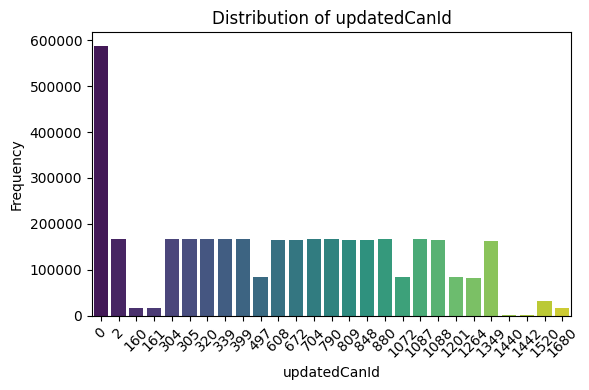

In [8]:
plot_bar_chart(dos_df_pd,"updatedCanId")

In [ ]:
print(fuzzy_df_pd["updatedCanId"].value_counts()[:20])

2048
updatedCanId
790     182121
2       180011
399     179802
704     179637
1087    179538
848     178687
339     178188
304     178149
608     178049
880     177691
672     177174
305     176116
809     175761
1088    175479
320     175211
1349    173707
1072     92917
1201     90109
497      89766
1264     88946
Name: count, dtype: int64


In [24]:
print(fuzzy_df_pd["updatedCanId"].value_counts()[20:40])

updatedCanId
688     53477
1520    34617
160     18266
161     17930
1680    17880
1440     1988
1442     1932
1706      458
1999      446
802       294
481       293
1282      293
136       291
1845      289
65        288
630       286
1489      285
1765      284
291       284
1093      283
Name: count, dtype: int64


#### dlc

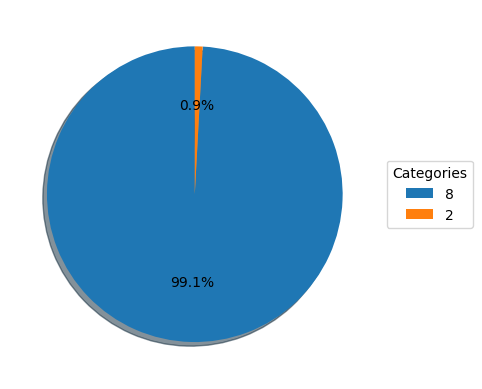

In [81]:
plot_pie_chart(dos_df_pd,"dlc")

In [10]:
dos_df_pl["dlc"].value_counts()

dlc,count
i64,u32
2,31188
8,3634582


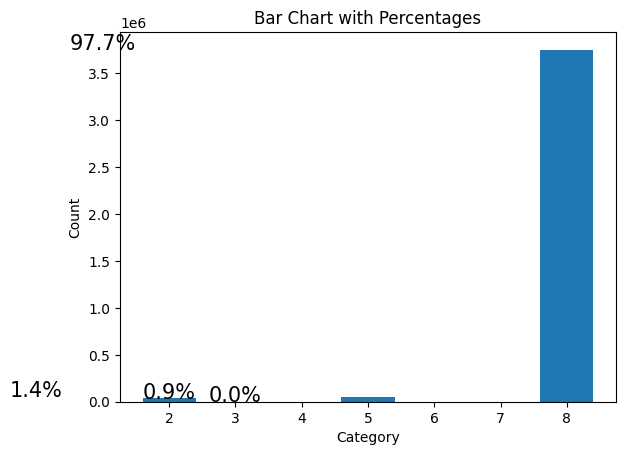

In [ ]:
plot_bar_chart_of_percentages(fuzzy_df_pd,"dlc")

#### updatedFlag

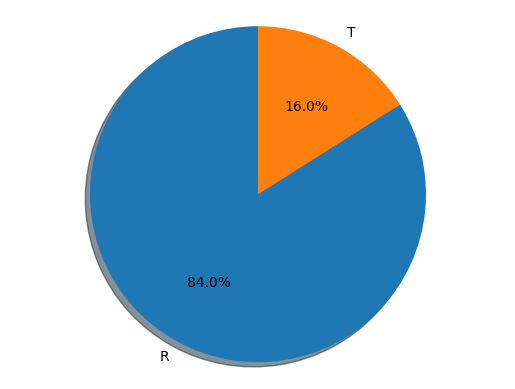

In [12]:
plot_pie_chart(dos_df_pd,"updatedFlag")

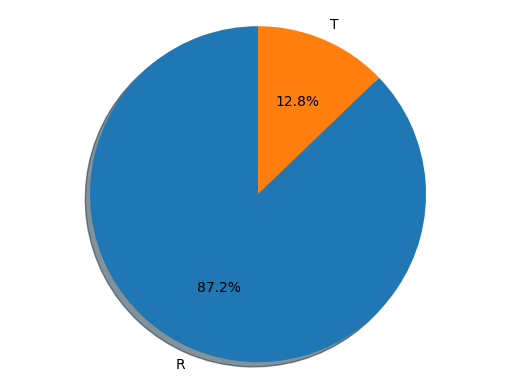

In [27]:
plot_pie_chart(fuzzy_df_pd,"updatedFlag")